In [ ]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               

# How to use R on Colab

Runtime / change runtime type / R
enjoy it!

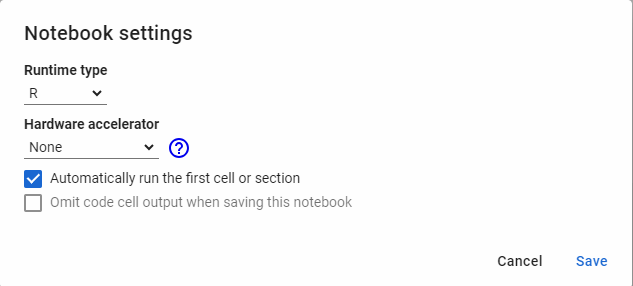

# 0.&nbsp;Liberaries

In [3]:
# Liberaries

if (!require("dplyr")) {
  install.packages("dplyr")
  library("dplyr")
} else {
  library("dplyr")
}

if (!require("TSA")) {
  install.packages("TSA")
  library("TSA")
} else {
  library("TSA")
}

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: TSA

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘TSA’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




# 1.&nbsp;Project 1

1. Two factors determine the brightness of a star: its luminosity (how much energy it puts out in a given time) and its distance from the Earth. The data in are nightly brightness measurements (in magnitude)
of a single star over a period of 600 nights.     
Data file: star (TSA). There are n = 600 observations. Measurements are taken each night.      

- (a) Construct a time series plot for the star data.  

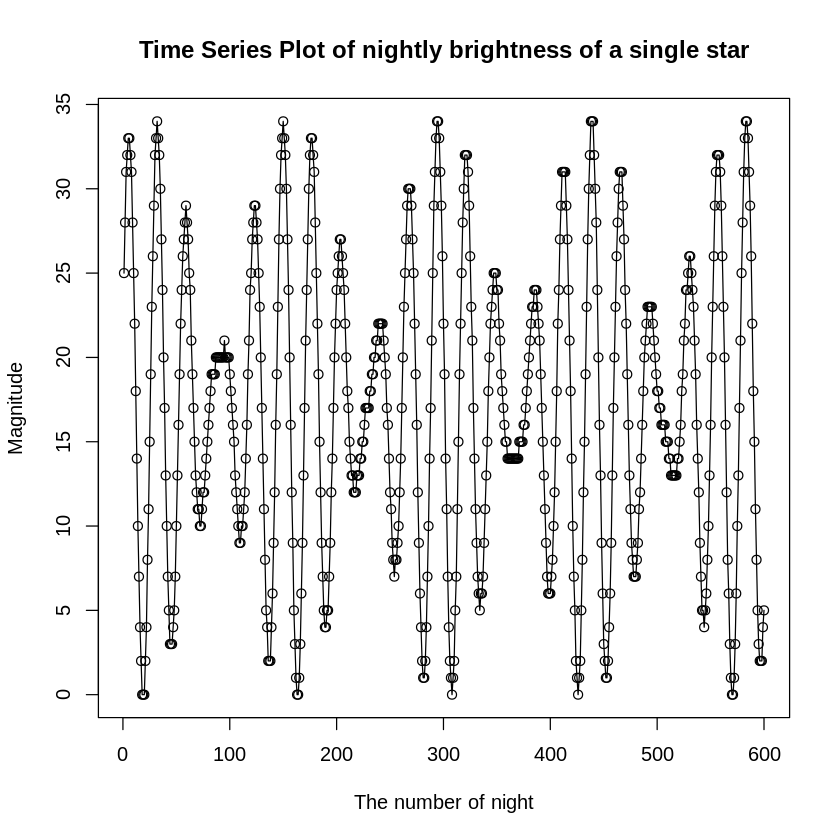

In [ ]:
library(TSA)
data(star)
df = star

# Time Series Plot
plot(df, ylab="Magnitude",
         xlab="The number of night",
         type="o",
         main="Time Series Plot of nightly brightness of a single star")


- (b) Construct a lag-1 scatter plot,     

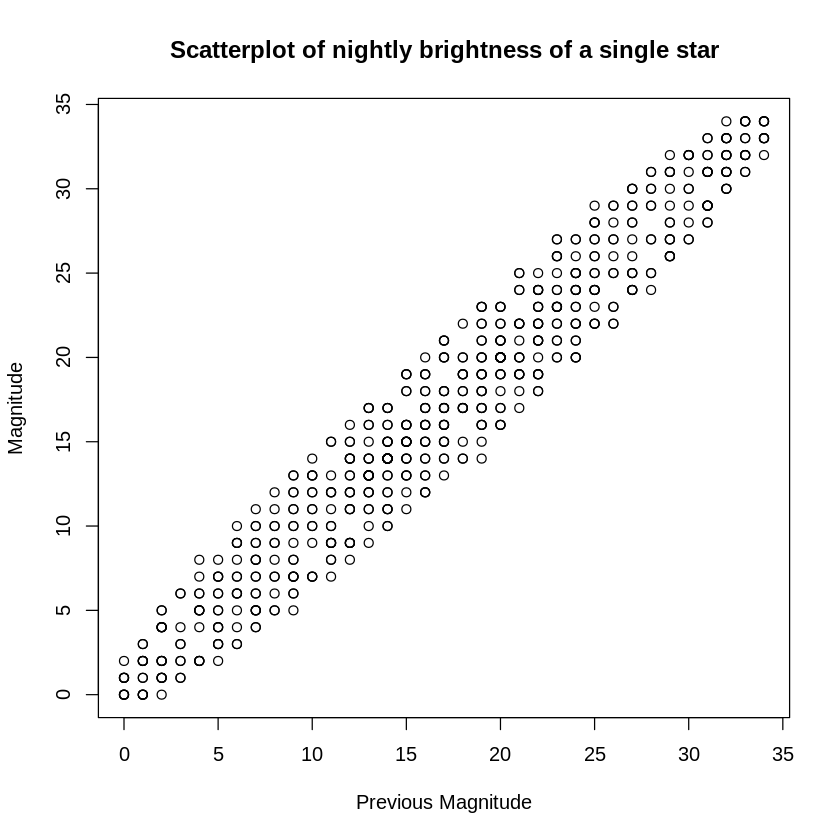

In [ ]:
require(TSA)
data(star)

#Lag-1 scatterplot
plot(y = star,
     x = zlag(star,1),
     ylab = "Magnitude",
     xlab = "Previous Magnitude",
     #type = "o",
     main = "Scatterplot of nightly brightness of a single star" )

- and calculate lag-1 correlation.

In [ ]:
# Lag-12 correlation
cor(star, zlag(star,1), use="complete.obs")


Star,0.9724252


- (c) What noticeable patterns you observed?     

    - **Answer**: There is a high correlation between two consecutive values. A clear trend is seen in the plot of "star" dataset.      

- (d) Can you predict the brightness of stars next night based on the brightness of stars in the previous night.     
    - **Answer**: I think so. Because there is a clear pattern in the data. Also, based on physics perspective, brightness of the stars has an accurate behaviour.
---    

2. The Bureau of Transportation Statistics publishes monthly passenger traffic data reflecting 100 percent of scheduled operations for airlines in the United States. The data are monthly U.S. airline passenger miles traveled from 1/1996 to 5/2005.        
Data file: airmiles(TSA). There are n = 113 observations. Measurements are taken each month.      

- (a) Construct a time series plot with monthly plotting symbols for the airmiles data.  

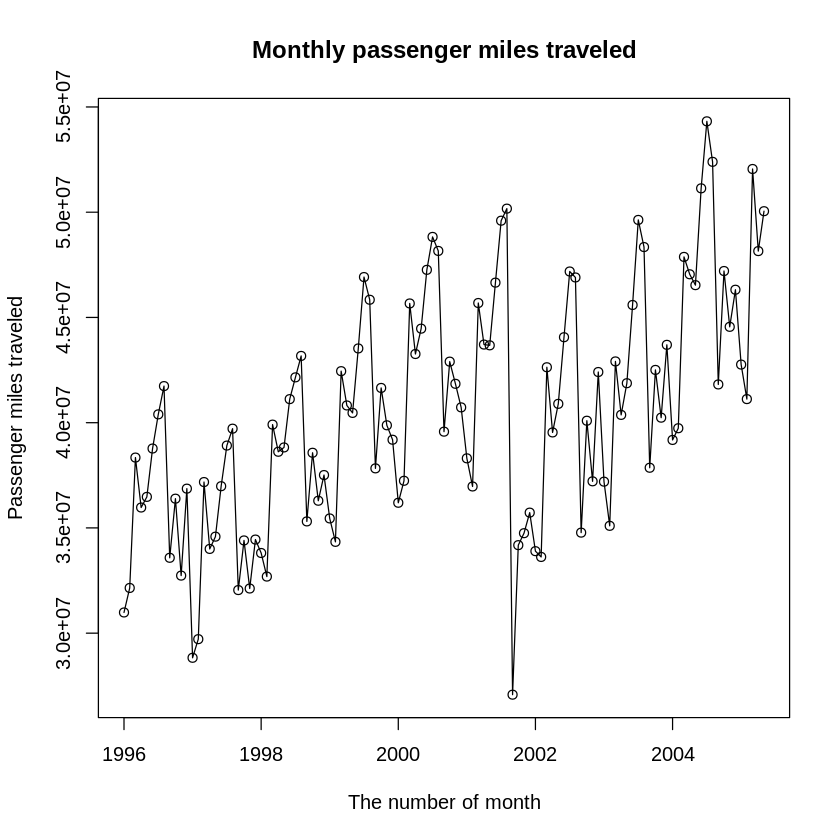

In [ ]:
require(TSA)
data("airmiles")
df = airmiles

#Time Series Plot
plot(df,
     ylab = "Passenger miles traveled",
     xlab = "The number of month",
     type = "o",
     # Note 1: To add the initials of the months, it would be better to use  type = "l"
     main = "Monthly passenger miles traveled" )
#points(y=df,x=time(df),pch=as.vector(season(df)))
# Note 2: The above line adds the initials of the months on the points.

- (b) Construct a lag-12 scatter plot and calculate lag-12 correlation.        


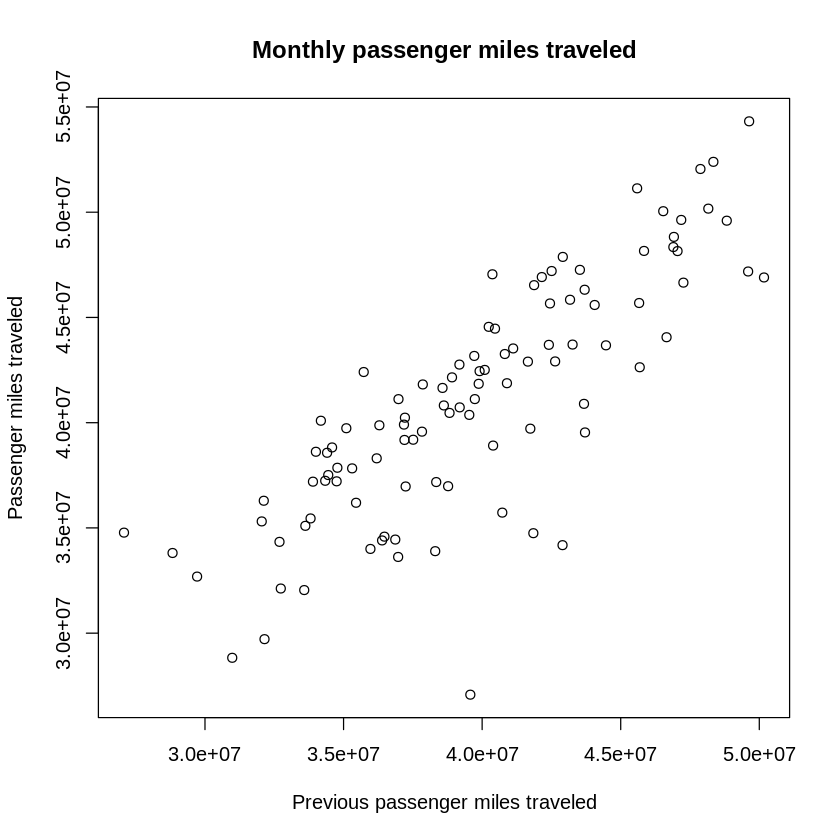

In [ ]:
require(TSA)
data("airmiles")
df = airmiles

# Lag-12 scatterplot
plot(y = df,
     x = zlag(df,12),
     ylab = "Passenger miles traveled",
     xlab = "Previous passenger miles traveled",
     #type = "o",
     main = "Monthly passenger miles traveled" )


In [ ]:
# Lag-12 correlation
cor(airmiles, zlag(airmiles,12), use="complete.obs")


airmiles,0.8147223


- (c) What noticeable patterns you observed?    
    - **Answer**: The only pattern I can see in about an increasing general trend.     


- (d) Can you predict the air miles in December 2004 based on the air miles in December 2003? Why or why not?     
    - **Answer**: No. Because again, I would say, the only pattern I can see in about an increasing general trend.

#2.&nbsp;Project 2

1. Answer the following questions using simulated date. Please make sure you set the seed of R’s random number generator, which makes your simulations reproducible.  

(a) Simulate and plot a white noise process $e_{t}\sim \ iid \ \ \chi^2(1)$ of length $n = 150$.

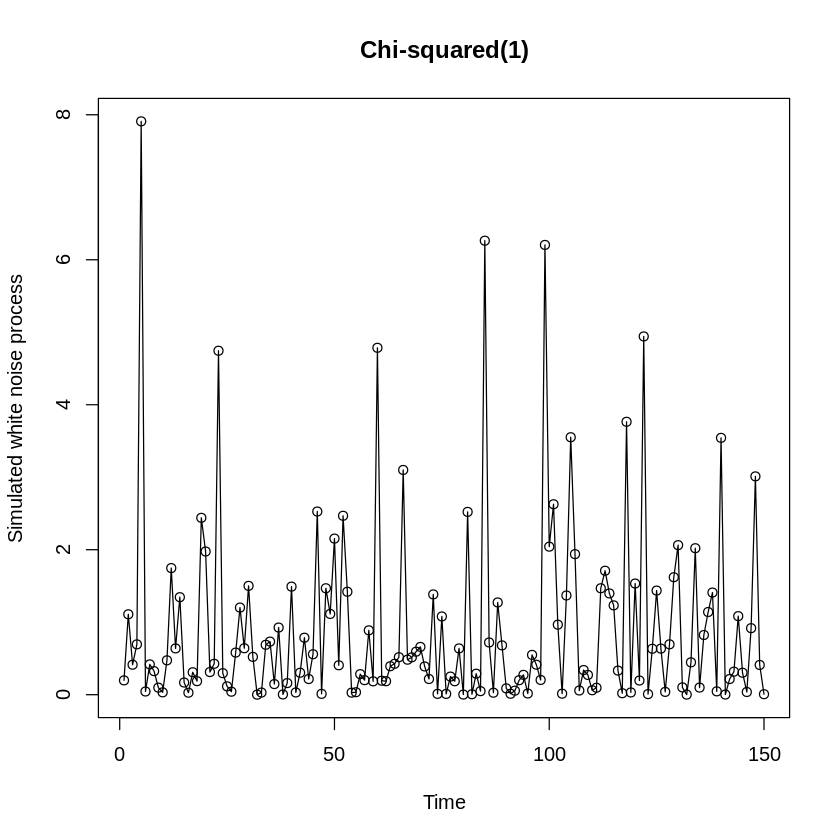

In [ ]:
library (TSA) # Load the TSA package

# Example 1: white noise
# noises are Chi-squared(1) distributed
set.seed(1)
wn.chisq1 = rchisq(150,1)

plot(wn.chisq1,
     ylab="Simulated white noise process",
     xlab="Time",
     main="Chi-squared(1)",
     type="o")

(b) For your simulated series, create and plot the corresponding random walk process $Y_{t} = Y_{t-1} + e_{t}$.
Please note that the mean of this random walk process is not zero.

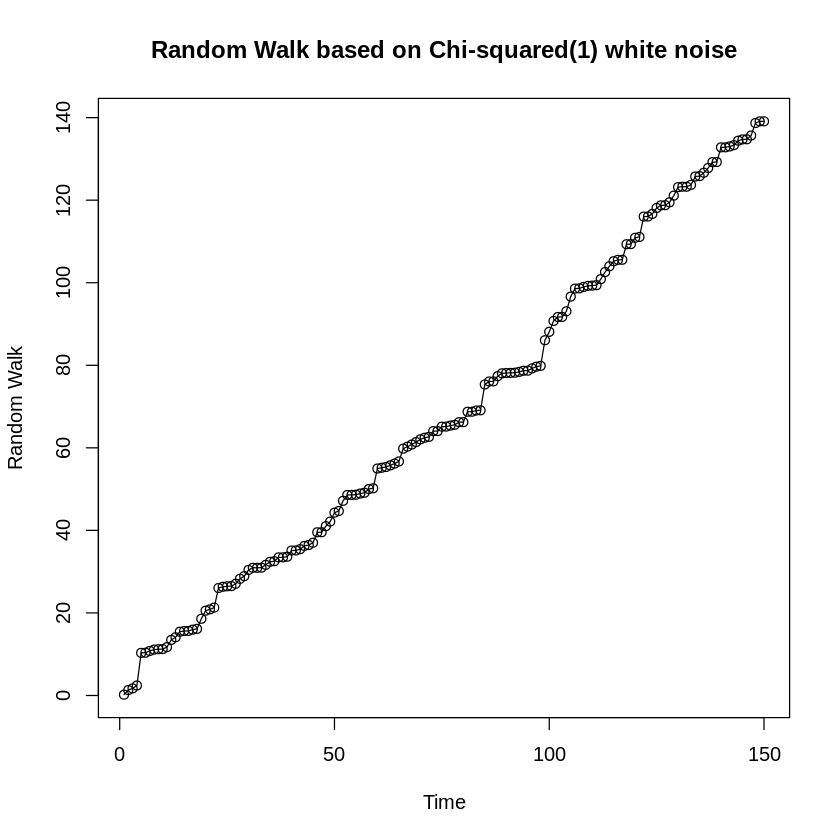

In [ ]:
# Example 2: random walk
# Part 1: random walk based on Chi-squared(1) distribution
# Time Series Plot

set.seed(1)
wn.chisq1 = rchisq(150,1)

random.walk.chisq1 = c() #wn.chisq1*0 #To make a zero vector with the length of wn.chisq1
for(i in 1:length(wn.chisq1))
   {random.walk.chisq1[i] = sum(wn.chisq1[1:i]) }

plot(random.walk.chisq1,
     ylab="Random Walk",
     xlab="Time",
     main="Random Walk based on Chi-squared(1) white noise",
     type="o")

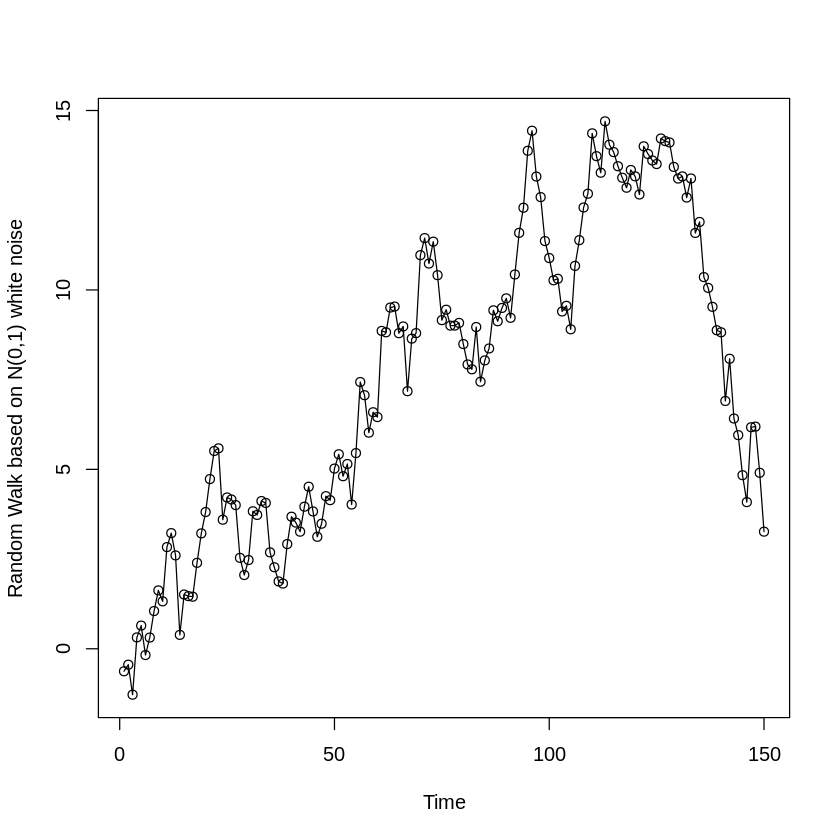

In [ ]:
set.seed(1)
wn.n01<-rnorm(150,0,1)
random.walk.n01<-wn.n01*0
for(i in 1:length(wn.n01))
{random.walk.n01[i]<-sum(wn.n01[1:i])
}
plot(random.walk.n01,ylab="Random Walk based on N(0,1) white noise",xlab="Time",type="o")

(c) Comment on the differences between this simulated random walk processes and the simulated random walk based on standard normal distribution.    
**Answer**: I think the main deference of these two is about that the mean of the Chi-squared(1) random walk process is not zero. This makes it cumulative. of course, it has fluctuations too but this size of ups and does are negligible in comparison with the whole scenario.   
Also the Chi-squared(1) oscillates in a wider range.

# 3.&nbsp;Project 3

  1. The data file winnebago in the TSA package contains monthly unit sales of recreational vehicles from Winnebago, Inc. from November 1966 through February 1972.  

In [ ]:
rm(list = ls())

library (TSA) # Load the TSA package
data(winnebago)
ts_data = winnebago
str(ts_data)

 Time-Series [1:64] from 1967 to 1972: 61 48 53 78 75 58 146 193 124 120 ...


1.a. Display and interpret the time series plot for this data.      
**Answer**: There is an increasing monthly trend in the TS data. Also we can interpret that as times goes, this increasing trend is increasing too. I mean maybe a non-linear model may interpret this data better than a linear one. Of course, my interpretation is just based on this plot, after more investigation (for example in part c),  the interpretation may change slightly.

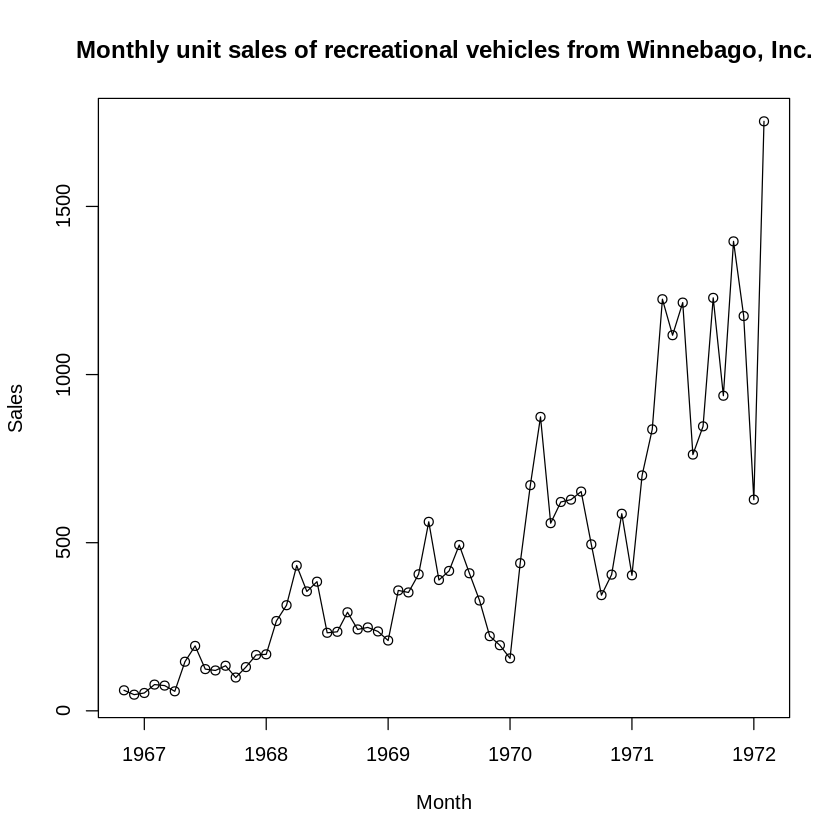

In [ ]:
plot(ts_data, ylab="Sales",xlab="Month",type="o"
            ,main="Monthly unit sales of recreational vehicles from Winnebago, Inc.")

1.b. Use least squares to fit a linear time trend to this time series and write down your fitted model.   
**Answer**:  $Sales = -394885.68 + 200.74 * time(ts\_data)$


Call:
lm(formula = ts_data ~ time(ts_data))

Residuals:
    Min      1Q  Median      3Q     Max 
-419.58  -93.13  -12.78   94.96  759.21 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -394885.68   33539.77  -11.77   <2e-16 ***
time(ts_data)     200.74      17.03   11.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 209.7 on 62 degrees of freedom
Multiple R-squared:  0.6915,	Adjusted R-squared:  0.6865 
F-statistic: 138.9 on 1 and 62 DF,  p-value: < 2.2e-16


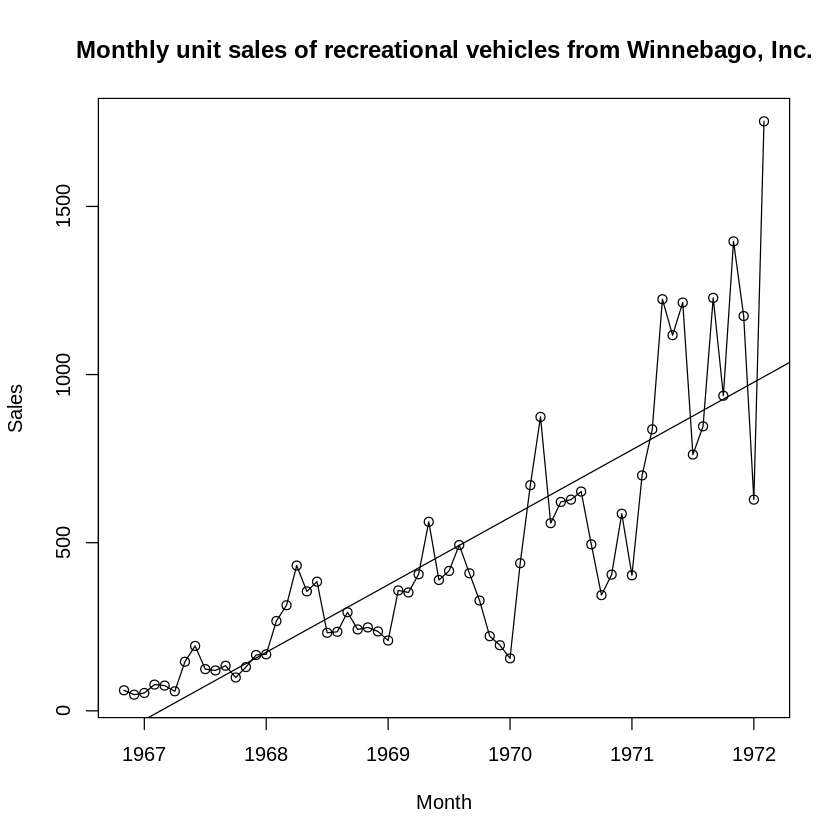

In [ ]:
# fitting using simple linear regression
fit <- lm(ts_data~time(ts_data))
summary(fit)
plot(ts_data, ylab="Sales",xlab="Month",type="o"
            ,main="Monthly unit sales of recreational vehicles from Winnebago, Inc.")
abline(fit)

1.c. Construct and interpret the time series plot for the residuals obtained from part (b).    
**Answer**: The residual plot helped me to figure out that Although there is an uptrend, there is also a fluctuation around the fitted line. And as times goes, in general, the residuals become bigger and bigger. Of course again, this interpretation is based on the these plots and it may slightly change in part d.

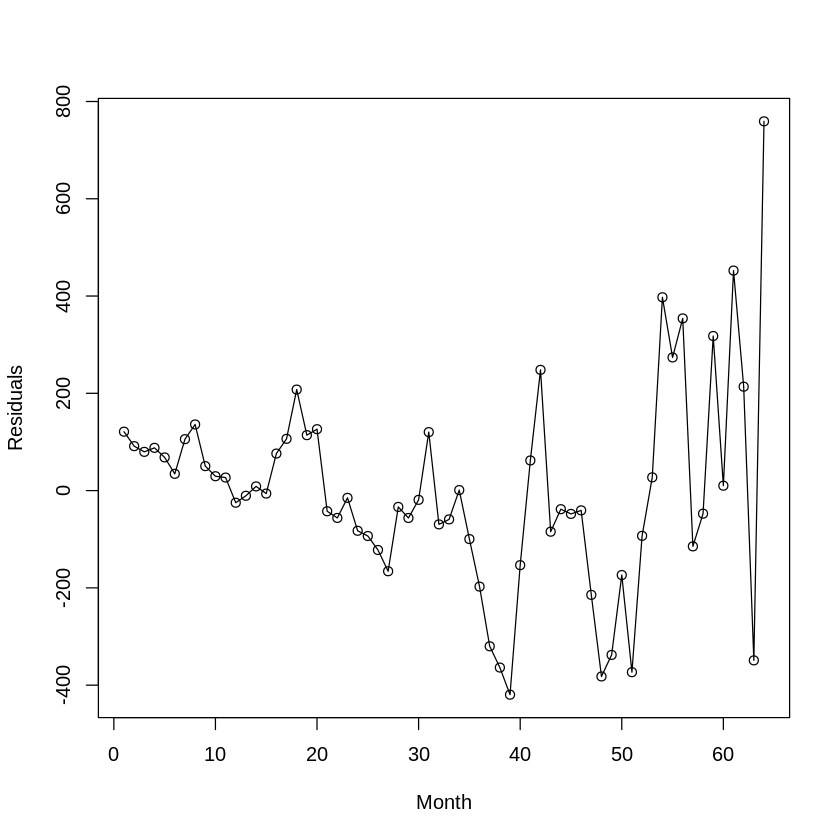

In [ ]:
# Residuals from straight line model fit
fit <- lm(ts_data~time(ts_data))
plot(resid(fit),ylab="Residuals",xlab="Month",type="o")

1.d. Now take natural logarithms of the monthly sales figures and display and interpret the time series plot of the transformed values.     
**Answer**: Now, I have a better idea about the data. They have a logarithmic nature. Because the logarithmic transformed data has a uptrend and explains why as time goes, the residuals become biger and biger.

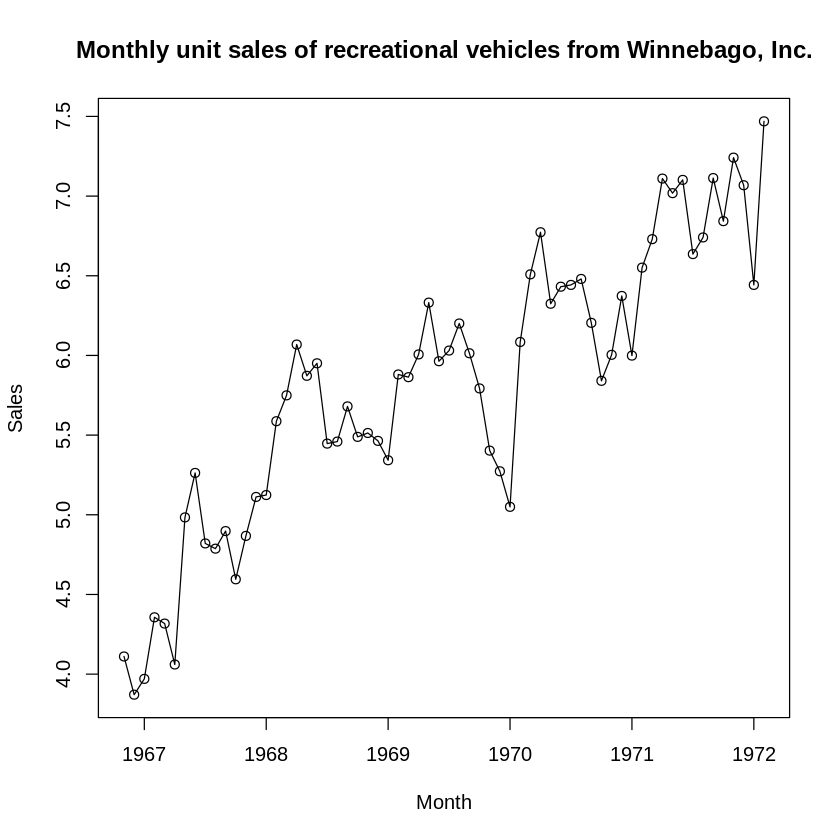

In [ ]:
log_ts_data = log(ts_data)
#str(log_ts_data)
plot(log_ts_data, ylab="Sales",xlab="Month",type="o"
            ,main="Monthly unit sales of recreational vehicles from Winnebago, Inc.")

1.e. Use least squares to fit a line to the logged data and write down your fitted model.     
**Answer**:  $log(Sales) = -984.93878 + 0.50306 * time(ts\_data)$


Call:
lm(formula = log_ts_data ~ time(ts_data))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03669 -0.20823  0.04995  0.25662  0.86223 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -984.93878   62.99472  -15.63   <2e-16 ***
time(ts_data)    0.50306    0.03199   15.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3939 on 62 degrees of freedom
Multiple R-squared:  0.7996,	Adjusted R-squared:  0.7964 
F-statistic: 247.4 on 1 and 62 DF,  p-value: < 2.2e-16


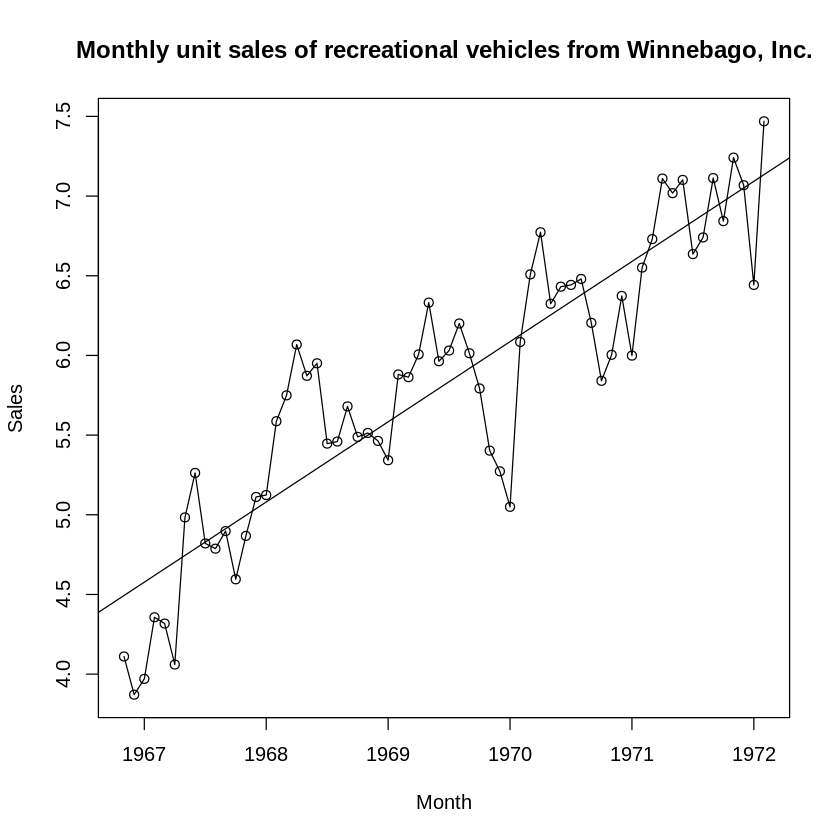

In [ ]:
# fitting using simple linear regression
fit <- lm(log_ts_data~time(ts_data))
summary(fit)
plot(log_ts_data, ylab="Sales",xlab="Month",type="o"
            ,main="Monthly unit sales of recreational vehicles from Winnebago, Inc.")
abline(fit)

1.f. Construct and interpret the time series plot for residuals from part (e).  
**Answer**: The points evenly distributed around zero. So, we can interpret that the sales data has a logarithmic nature and a logarithmic transform can explain the behavior of this data.

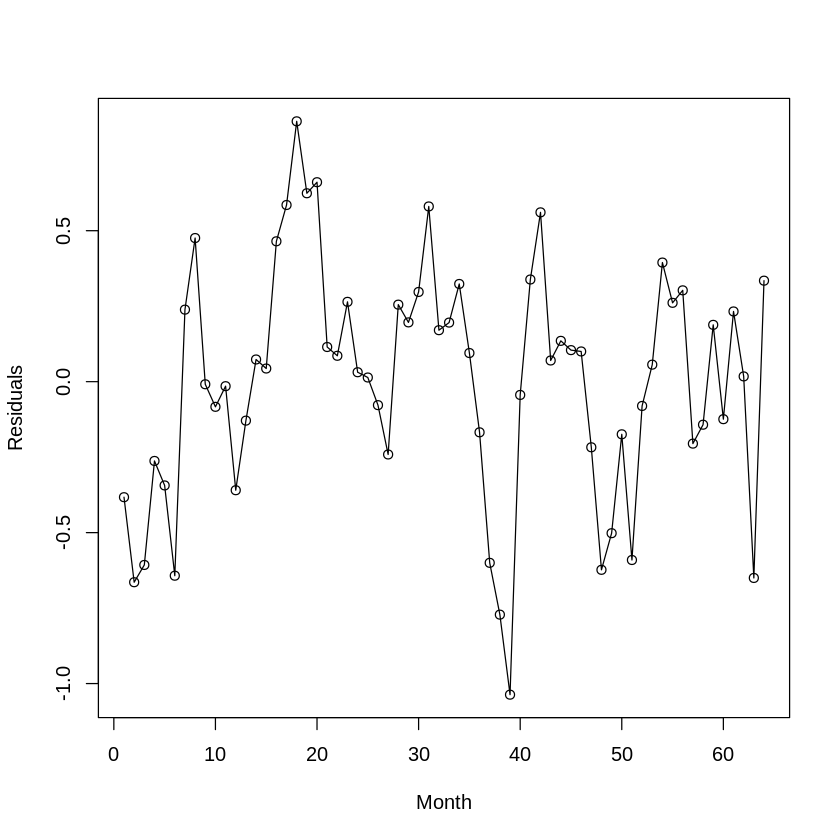

In [ ]:
# Residuals from straight line model fit
fit <- lm(log_ts_data~time(ts_data))
plot(resid(fit),ylab="Residuals",xlab="Month",type="o")

2.
**Note**: In problem 2, although the data do show some seasonality as well as linear decreasing pattern in general, you don't need to consider seasonality for this problem. I have added the specific form (linear trend) for the model in problem 2 a).

Tuberculosis, commonly known as TB, is a bacterial infection that can spread through the lymph nodes and bloodstream to any organ in your body (it is most often found in the lungs). Most people who are exposed to TB never develop symptoms, because the bacteria can live in an inactive form in the body. But if the immune system weakens, such as in people with HIV or in elderly adults, TB bacteria can become active and fatal if untreated. The numbers of TB cases (per month) in the United States from January 2000 to December 2009 are catalogued in the data file “tb”.

**Hint**:
You may use the following codes to load the data.

`library(TSA)`    
`##`      
`## Attaching package: ’TSA’`    
`## The following objects are masked from ’package:stats’:`     
`##`     
`## acf, arima`      
`## The following object is masked from ’package:utils’:`      
`##`      
`## tar`      
`tb = ts(read.table(file = "tb.txt"), freq=12, start=c(2000,1))`

In [ ]:
tb = ts(read.table(file = "tb.txt"), freq=12, start=c(2000,1))
ts_data = tb
ts_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,1100,1324,1482,1259,1412,1406,1218,1335,1176,1141,941,535
2001,1106,1159,1376,1353,1447,1324,1153,1359,1100,1159,900,553
2002,1053,1129,1318,1353,1329,1253,1206,1182,1047,1018,812,518
2003,1106,1065,1241,1306,1306,1188,1206,1129,1065,1094,818,529
2004,1059,1082,1335,1212,1229,1241,1182,1182,1018,994,788,565
2005,1059,1024,1259,1171,1265,1235,1065,1106,1000,965,794,524
2006,1018,1041,1200,1153,1218,1118,1024,1171,935,941,776,547
2007,971,965,1165,1141,1124,1176,1088,1112,959,853,788,500
2008,1000,971,1071,1159,1106,1041,1129,994,929,929,700,541
2009,776,888,1006,1035,976,1012,965,906,818,771,688,535


2.a. Use the methods in Chapter 3 to fit a linear trend model of the form $Y = b_{0}+b_{1}t+X_{t}$ where $E(X_{t}) = 0$.

In [ ]:
# fitting using simple linear regression
fit <- lm(ts_data~time(ts_data))
summary(fit)


Call:
lm(formula = ts_data ~ time(ts_data))

Residuals:
    Min      1Q  Median      3Q     Max 
-658.84  -62.21   30.55  148.66  268.10 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   72929.27   12770.83   5.711 8.56e-08 ***
time(ts_data)   -35.85       6.37  -5.628 1.25e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 201.4 on 118 degrees of freedom
Multiple R-squared:  0.2117,	Adjusted R-squared:  0.205 
F-statistic: 31.68 on 1 and 118 DF,  p-value: 1.248e-07


2.b. Produce a plot that displays the time series data with your fitted line.

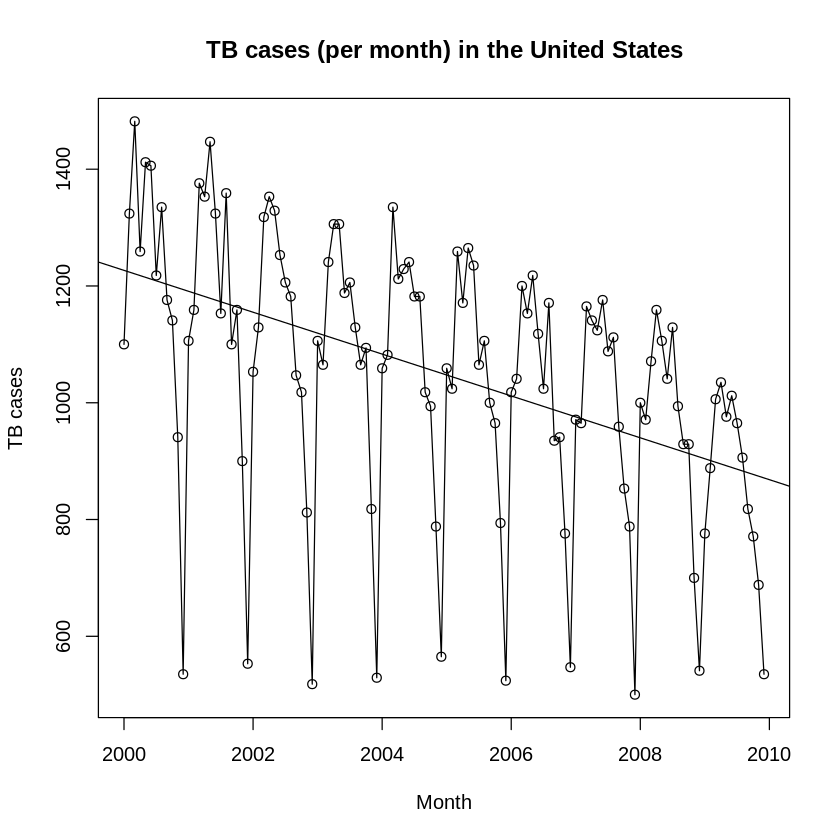

In [ ]:
plot(ts_data, ylab="TB cases",xlab="Month",type="o"
            ,main="TB cases (per month) in the United States")
abline(fit)

c. Examine the standardized residuals $\hat X_{t}^*$ from your fitted model for normality and independence. What are your conclusions? Do the standardized residuals look to resemble a normal, zero mean white noise process?     
**Answer**:    
Histogram:    
The histogram seems left-skewed. So, based on that I can say it is a left-skewed.   

QQ plot:     
As most of the data have been centered and they are on the reference line. However, the tails somehow do not follow reference line. And the tails' points are below the reference line. So, it is a left-skewed.    

Residuals plot:       
Although most of the points are above the reference line, those who are below the reference line have bigger residuals. And I would say they almost evenly distributed around the reference line. However, based on this plot I can not make sure about the normality.    

Test:     
"The p-value for the test is extremely small, so we would reject H0. The evidence points to the standardized residuals being not independent. The R output also produces the expected number of runs (computed under the assumption of independence). The observed number of runs is too much lower than the expected number to support independence." Lecture note, page 24.

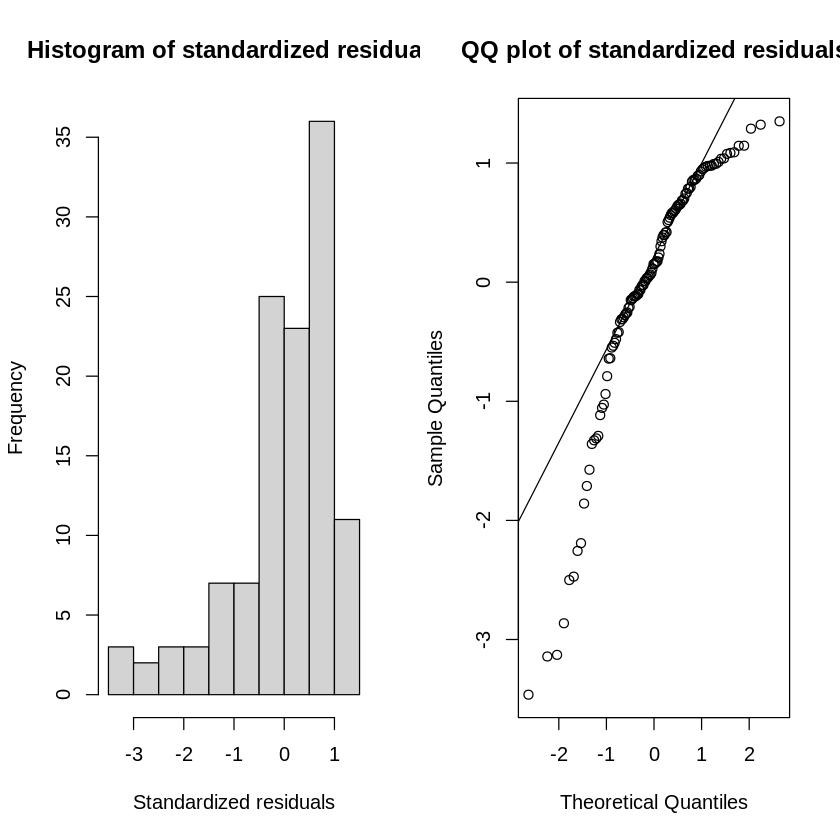

In [ ]:
# Standardized residuals from straight line model fit using a Histogram and a Q-Q plot
par(mfrow=c(1,2))
hist(rstudent(fit),  main="Histogram of standardized residuals",xlab="Standardized residuals")
qqnorm(rstudent(fit),main="QQ plot of standardized residuals")
qqline(rstudent(fit),main="QQ plot of standardized residuals")

$pvalue
[1] 8.79e-10

$observed.runs
[1] 27

$expected.runs
[1] 59.33333

$n1
[1] 50

$n2
[1] 70

$k
[1] 0

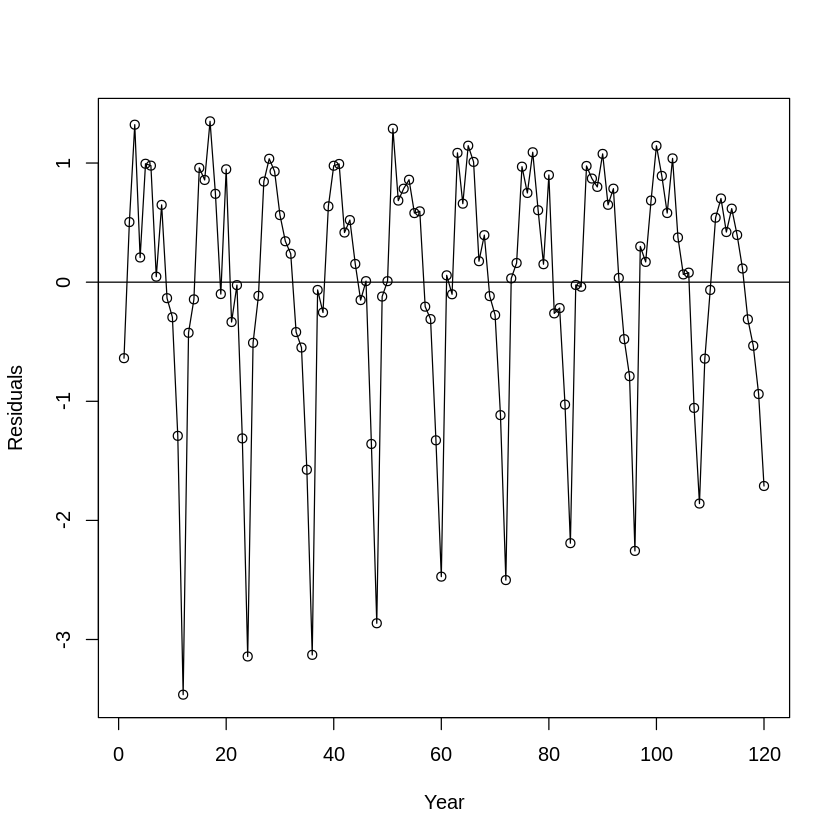

In [ ]:
### Part 2: Assessing Independence
# Standardized residuals from straight line model fit Horizontal line added at 0
plot(rstudent(fit),ylab="Residuals",xlab="Year",type="o")
abline(h=0)
# Runs test for independence on standardized residuals
runs(rstudent(fit))

d. Display the sample ACF for the standardized residual in part (c). What’s your conclusion?     
**Answer**: As there are some values that have exceeded the blue dash lines, I can interpret that there is a clear trend in the data. Also, at least one of the lags is much bigger (>0.6) than the blue dash line and I could consider "one" as too many. And it is not a white noise.   

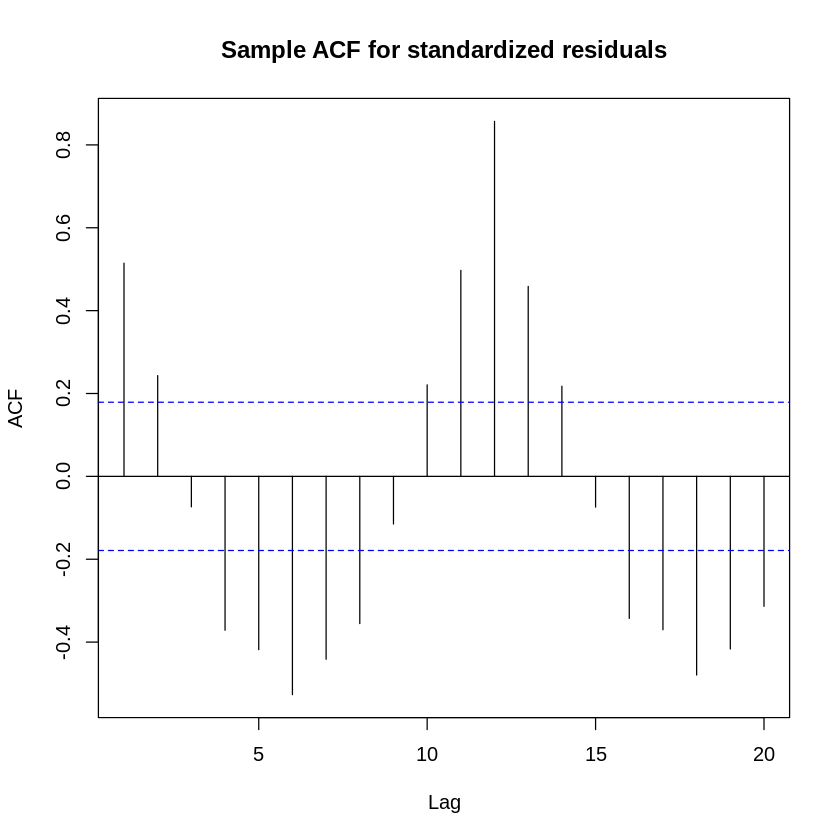

In [ ]:
### Part 3: Sample autocorrelation function
# Calculate sample ACF for standardized residuals
acf(rstudent(fit),main="Sample ACF for standardized residuals")

# 4.&nbsp;Project 4

In [ ]:
# To clean the environment
rm(list = ls())

#########################################################################################
#################### Chapter 4 : Models for Stationary Time Series ######################
#########################################################################################
library (TSA) # Load the TSA package

1.
1.a.
k=0 : 1          
k=1 : -0.2127      
k=2 : -0.2836    
k>2 : 0      

1.b.

In [ ]:
ACF = ARMAacf(ma=c(-0.5,-0.4), lag.max=3)
ACF

0          1          2          3 
 1.0000000 -0.2127660 -0.2836879  0.0000000

1.c.


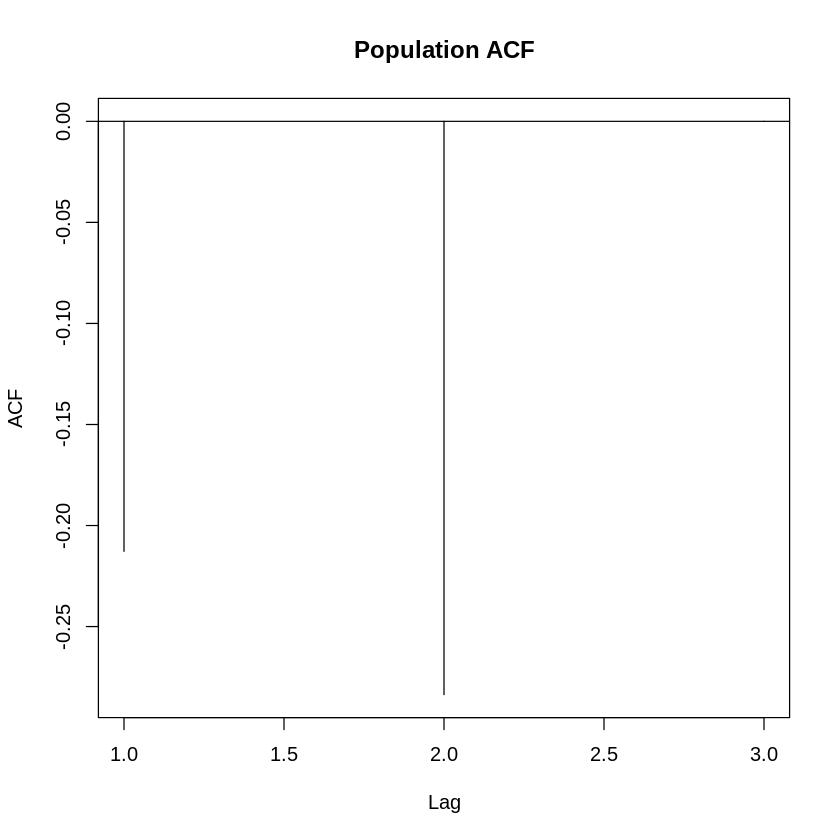

In [ ]:
ACF=ARMAacf(ma=c(-0.5,-0.4),lag.max=3)
plot(y=ACF[-1],x=1:3,xlab='Lag',ylab='ACF',main="Population ACF", type='h')
abline(h=0)

2.
**Hint for Problem 2 - Project #4**:     
Please note that this problem only asks about population ACF, not sample ACF, because the problem does not even ask you to simulate time series. The ACF you obtained in a) and b) should be exactly the same.       
Neither 1 nor 2 says a sample size so both of them are about the **population** and the **ARMAacf()** function should be used. The **acf()** function is for the calculation of the **sample** autocorrelations. Hope it helps.      

|     | Function |
| --- | --- |
| population | ARMAacf() |
| samlpe     | acf()     |   

2.a.

In [ ]:
phi = 0.6
phi^(0:8)

[1] 1.00000000 0.60000000 0.36000000 0.21600000 0.12960000 0.07776000 0.04665600
[8] 0.02799360 0.01679616

2.b.

In [ ]:
ACF=ARMAacf(ar=c(0.6),lag.max=8)
ACF

0          1          2          3          4          5          6 
1.00000000 0.60000000 0.36000000 0.21600000 0.12960000 0.07776000 0.04665600 
         7          8 
0.02799360 0.01679616

2.c.

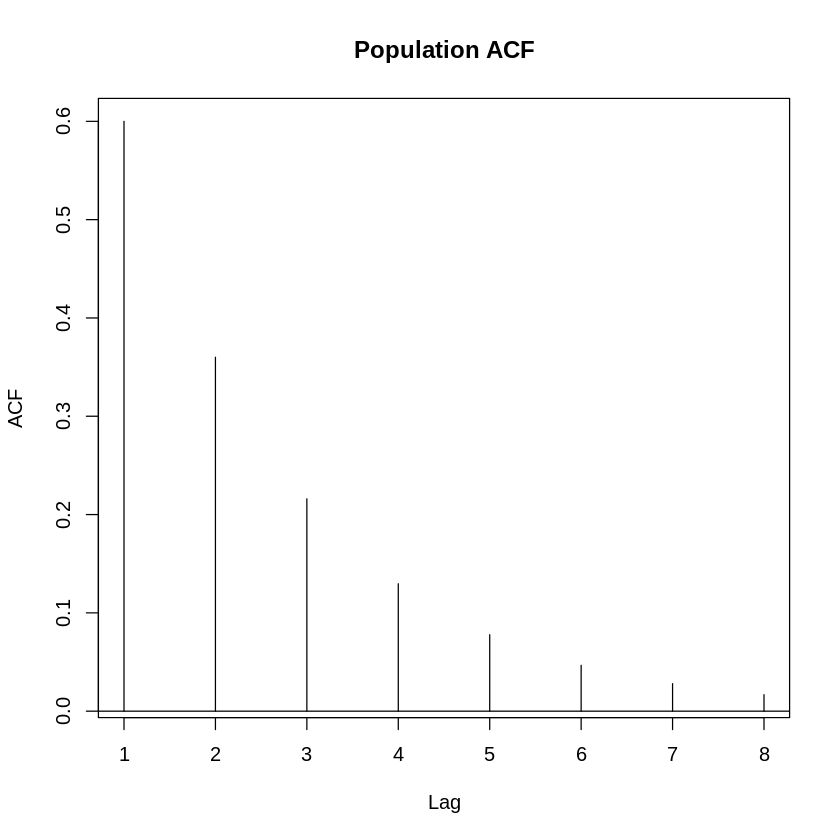

In [ ]:
ACF=ARMAacf(ar=c(0.6),lag.max=8)
plot(y=ACF[-1],x=1:8,xlab='Lag',ylab='ACF',main="Population ACF",type='h')
abline(h=0)

---

3.

In [ ]:
RNGkind (sample.kind = "Rounding")   # To make the result of set.seed() identical in different OSs
set.seed(2)
ar.sim.1 <- arima.sim(list(order = c(1,0,0), ar = -0.6), n = 200)

RNGkind (sample.kind = "Rounding")   # To make the result of set.seed() identical in different OSs
set.seed(2)
ma.sim.2 <- arima.sim(list(order = c(0,0,2), ma = c(-0.8,+0.5)), n = 200)
# Important! R's convention is to use positive thetas for MA models (so we have to negate)
# E.g., ma = 0.9 means theta = -0.9.

Warning message in RNGkind(sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”
Warning message in RNGkind(sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


3.a.

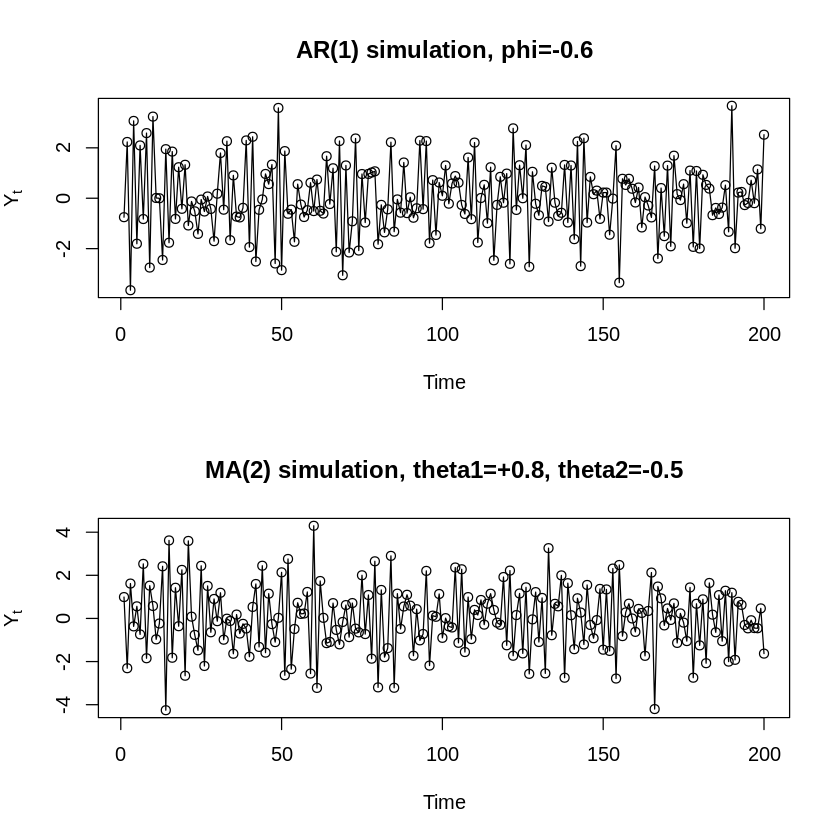

In [ ]:
par(mfrow=c(2,1))
plot(ar.sim.1,ylab=expression(Y[t]),xlab="Time",type="o",main="AR(1) simulation, phi=-0.6")
plot(ma.sim.2,ylab=expression(Y[t]),xlab="Time",type="o",main="MA(2) simulation, theta1=+0.8, theta2=-0.5")

3.b.

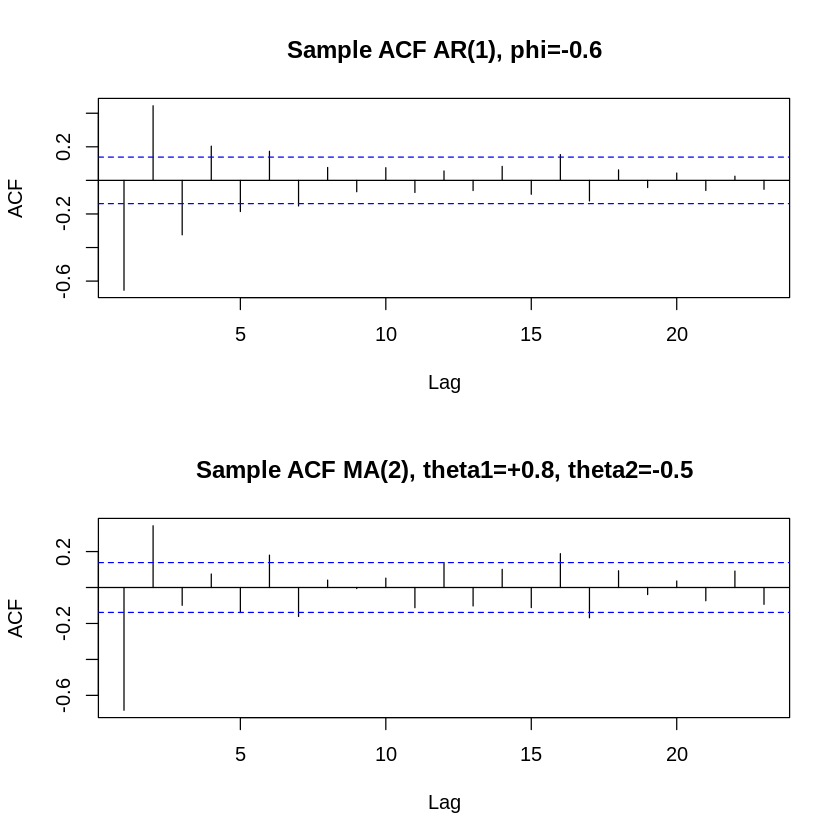

In [ ]:
par(mfrow=c(2,1))
#plot(ar.sim.1,ylab=expression(Y[t]),xlab="Time",type="o",main="AR(1) simulation, phi=-0.6")
acf(ar.sim.1,main="Sample ACF AR(1), phi=-0.6")
#plot(ma.sim.2,ylab=expression(Y[t]),xlab="Time",type="o",main="MA(2) simulation, theta1=+0.8, theta2=-0.5")
acf(ma.sim.2,main="Sample ACF MA(2), theta1=+0.8, theta2=-0.5")

3.c.
**MA(2): There are two spikes on K=1,2 that are in agreement with the theory. To compare the population and sample I plot both in the same frame.**

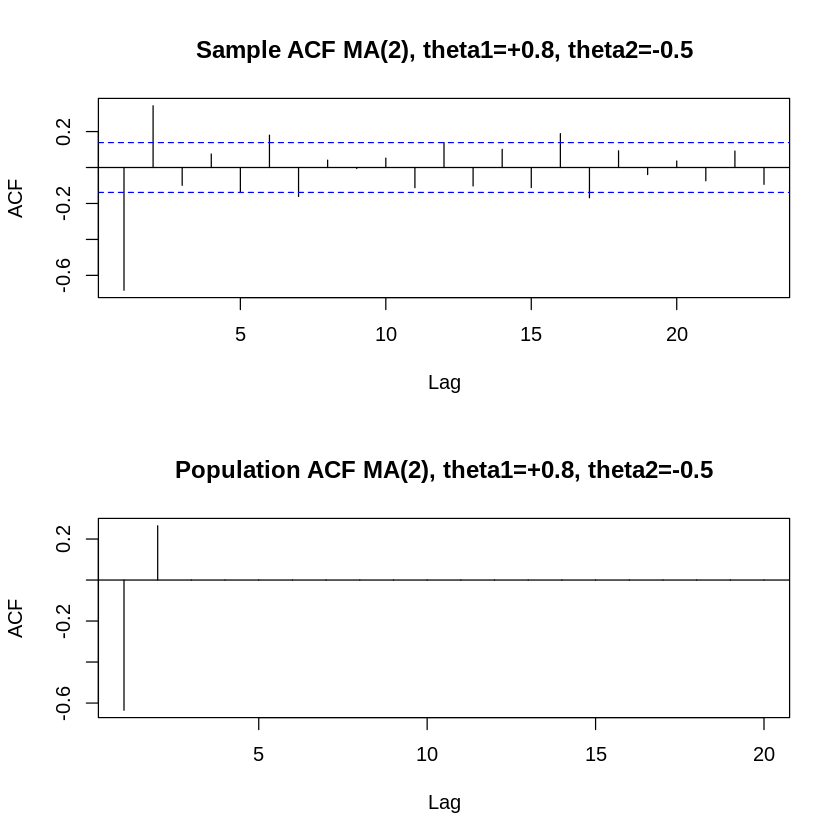

In [ ]:
# MA(2)
par(mfrow=c(2,1))
acf(ma.sim.2,main="Sample ACF MA(2), theta1=+0.8, theta2=-0.5")
ACF=ARMAacf(ma=c(-0.8,+0.5),lag.max=20)
plot(y=ACF[-1],x=1:20,xlab='Lag',ylab='ACF',main="Population ACF MA(2), theta1=+0.8, theta2=-0.5", type='h')
abline(h=0)

**AR(2): Spikes decay quickly with an alternating pattern. To compare the population and sample, I plot both in the same frame.**

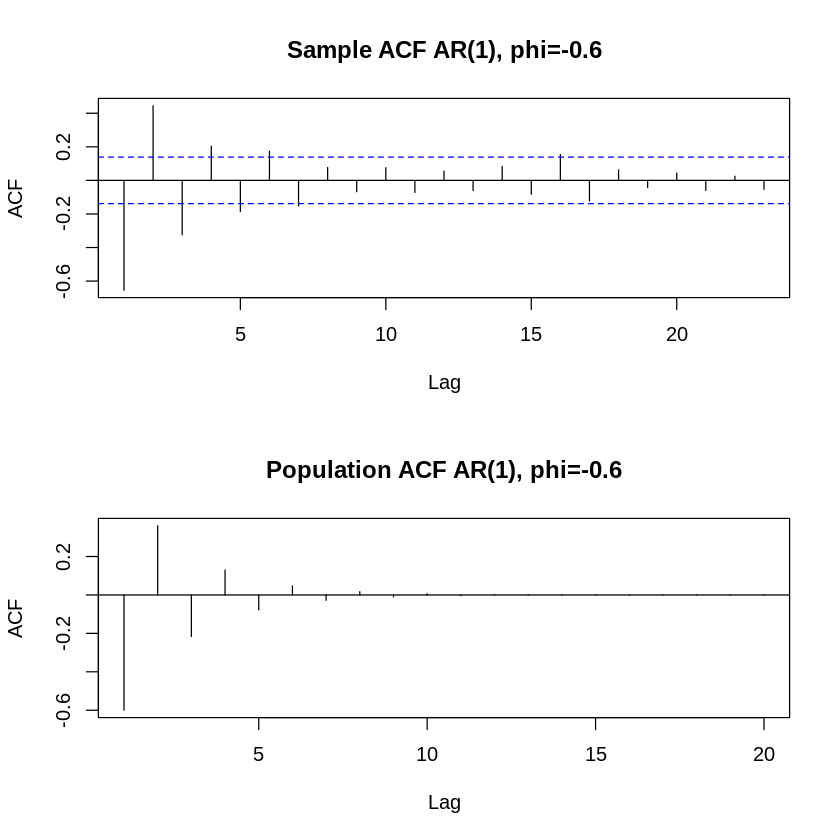

In [ ]:
# AR(1)
par(mfrow=c(2,1))
acf(ar.sim.1,main="Sample ACF AR(1), phi=-0.6")
ACF=ARMAacf(ar=c(-0.6),lag.max=20)
plot(y=ACF[-1],x=1:20,xlab='Lag',ylab='ACF',main="Population ACF AR(1), phi=-0.6",type='h')
abline(h=0)

# 5.&nbsp;Project 5

1.    

1.a.

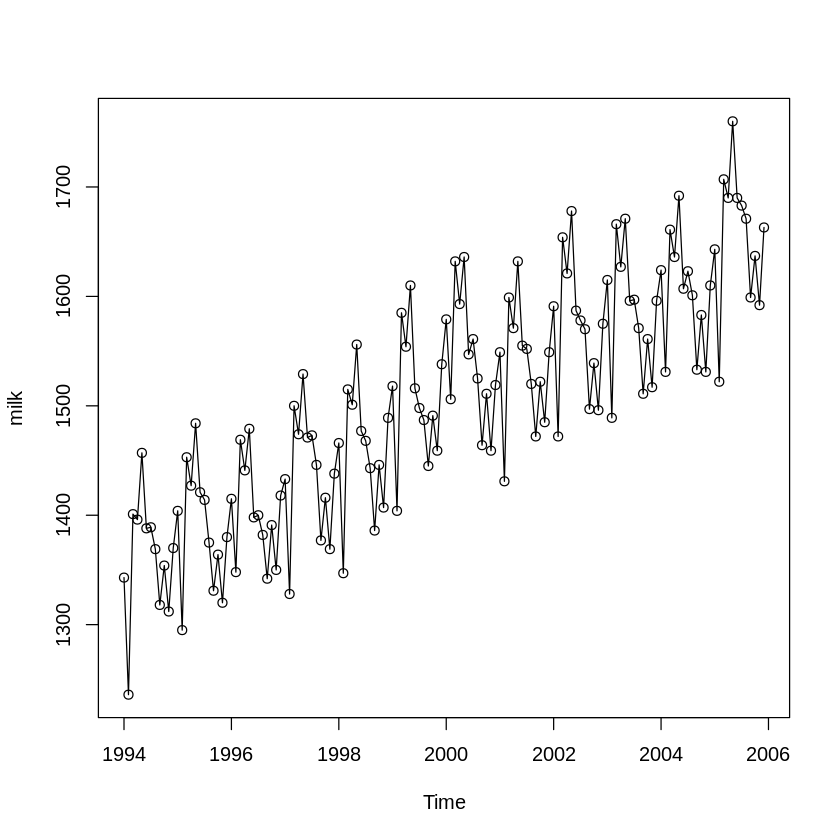

In [5]:
library(TSA)
data(milk)
plot(milk, type = "o")

**Answer**:      
- Increasing trend: Yes          
- mean: increasing              
- variance: almost constant                
- Seasonality trend: Somehow               
- Stationary: No           

1.b.

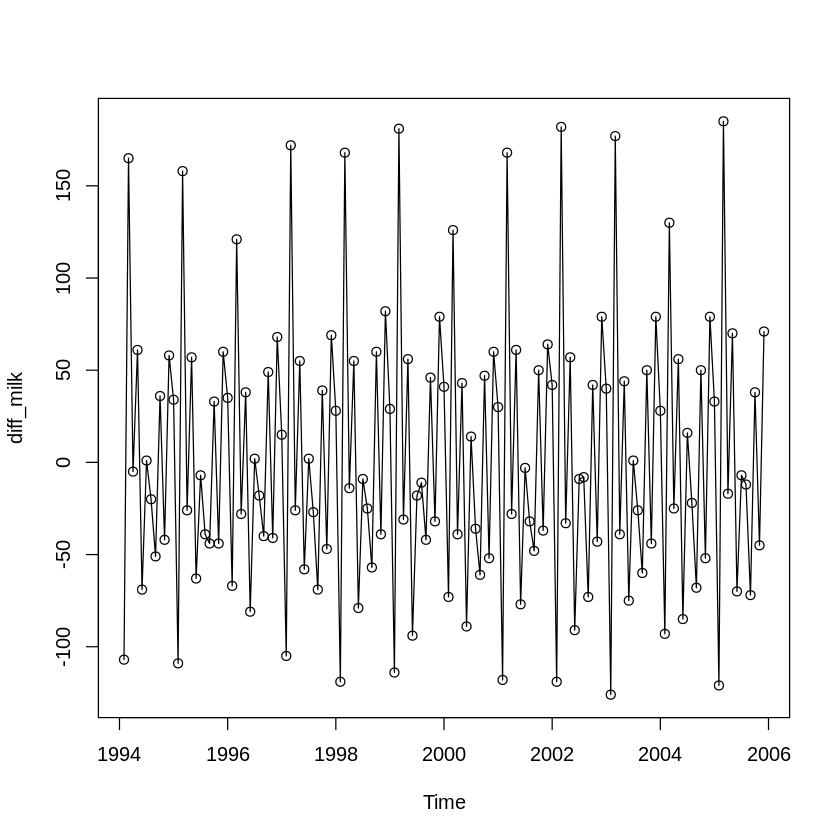

In [6]:
diff_milk <- diff(milk)
plot(diff_milk, ylab="diff_milk", type = "o")

**Answer**:      
- Increasing trend: Not anymore             
- mean: almost zero               
- variance: almost constant             
- Seasonality trend: Somehow             
- Stationary: It seems still not                          

The increasing trend has been removed compared to the original data but still could be following a seasonal trend.
when compared to the inital gragh the second looks more close to stationary.   


1.c.

In [7]:
fit1 <- lm(diff_milk~time(diff_milk))
fit1


Call:
lm(formula = diff_milk ~ time(diff_milk))

Coefficients:
    (Intercept)  time(diff_milk)  
      21.443908        -0.009603  


**Answer**:    
The slope `-0.009603` is very low. So, we can conclude that it is almost zero mean.

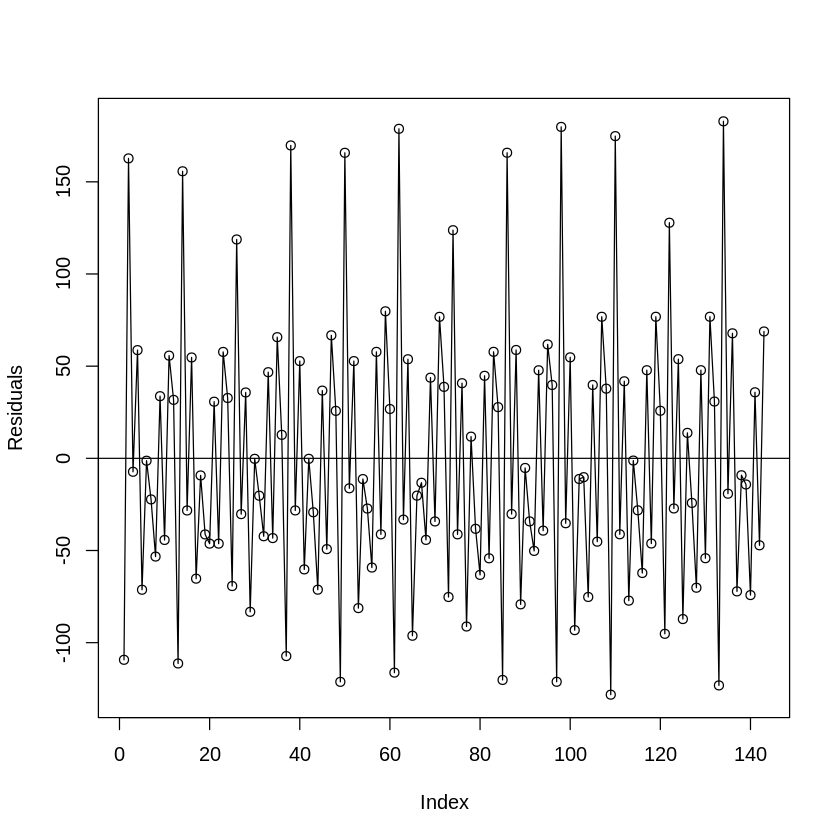

In [8]:
plot(fit1$residuals, ylab = "Residuals", type = "o")
abline(h = 0)

**Answer**:    
The points are evenly distributed around the abline=0. So, we can conclude that the variance is constant. However, there are some spikes that might be because of seasonality trend.So, it is hard to say that the residuals are independent. Finally, I think the residuals are not independent.

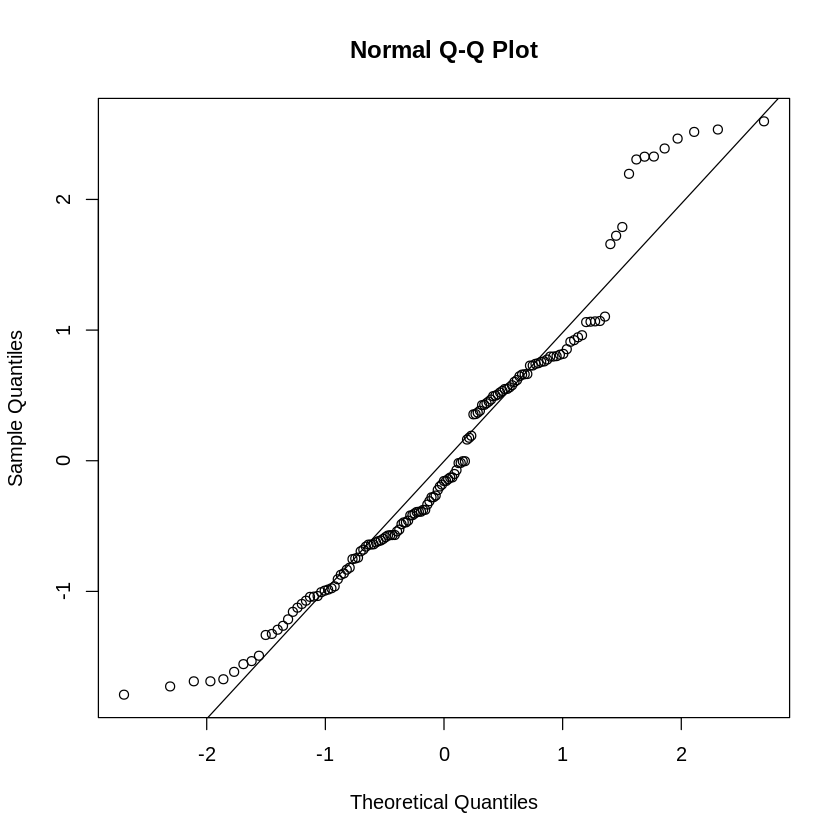

In [9]:
qqnorm(rstudent(fit1))
qqline(rstudent(fit1))

**Answer**:    
Not only is not it normal, but also we can see some level of seasonality in it.

In [10]:
shapiro.test(rstudent(fit1))


	Shapiro-Wilk normality test

data:  rstudent(fit1)
W = 0.95711, p-value = 0.0001978


**Answer**:    
From pvalue we conclude that the standardized residuals are not normally distributed.

In [11]:
runs(rstudent(fit1))

$pvalue
[1] 5.14e-07

$observed.runs
[1] 100

$expected.runs
[1] 70.95804

$n1
[1] 82

$n2
[1] 61

$k
[1] 0

**Answer**:    
first differences data: not normal & not independent

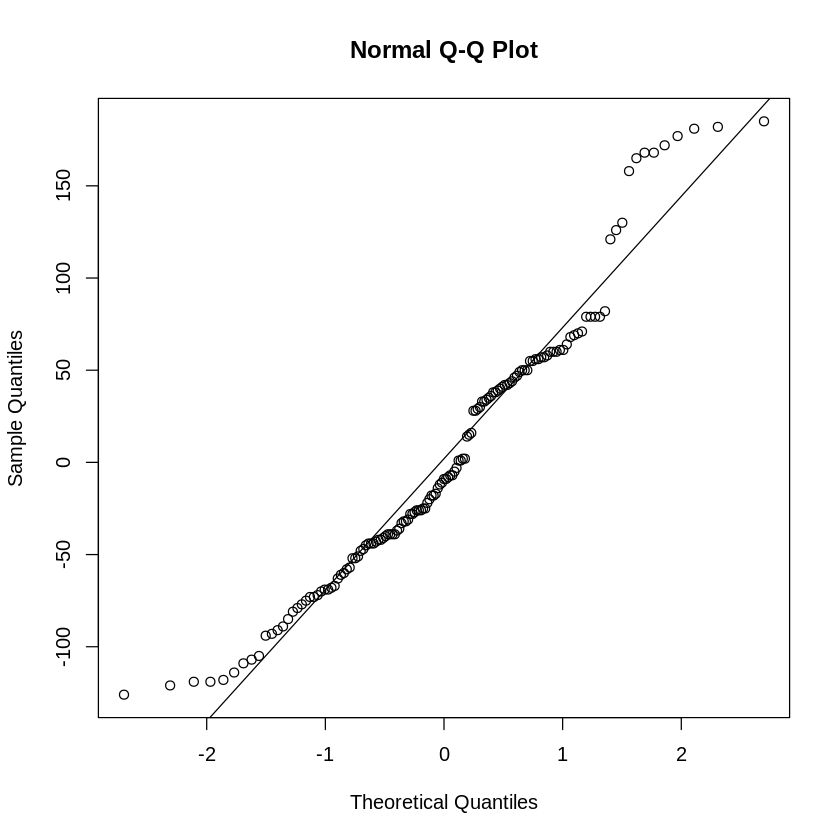

$pvalue
[1] 5.73e-10

$observed.runs
[1] 108

$expected.runs
[1] 71.90909

$n1
[1] 78

$n2
[1] 65

$k
[1] 0

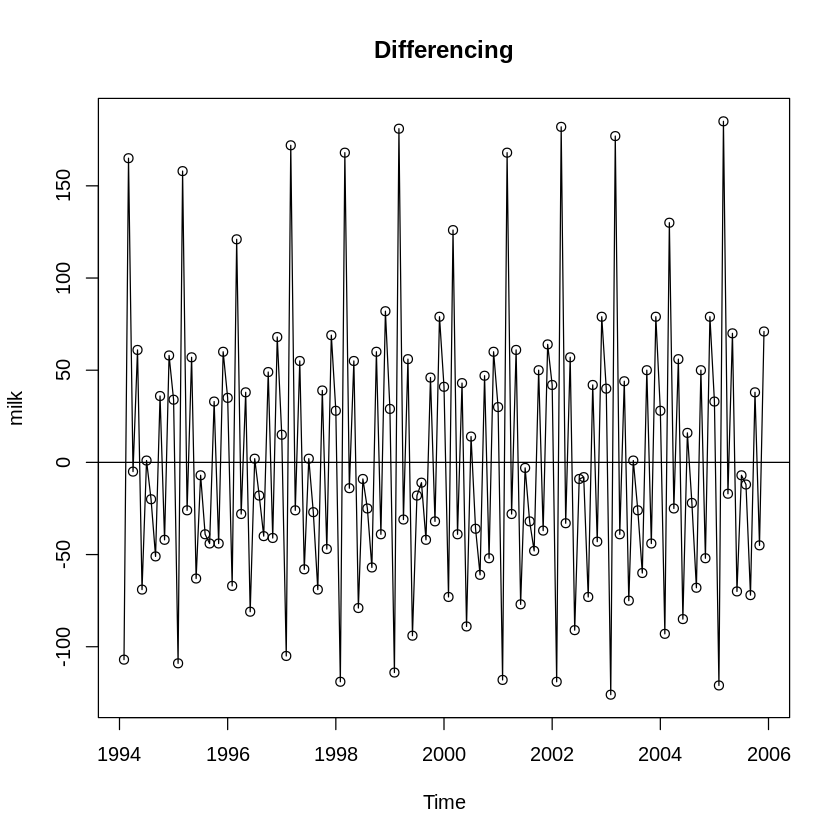

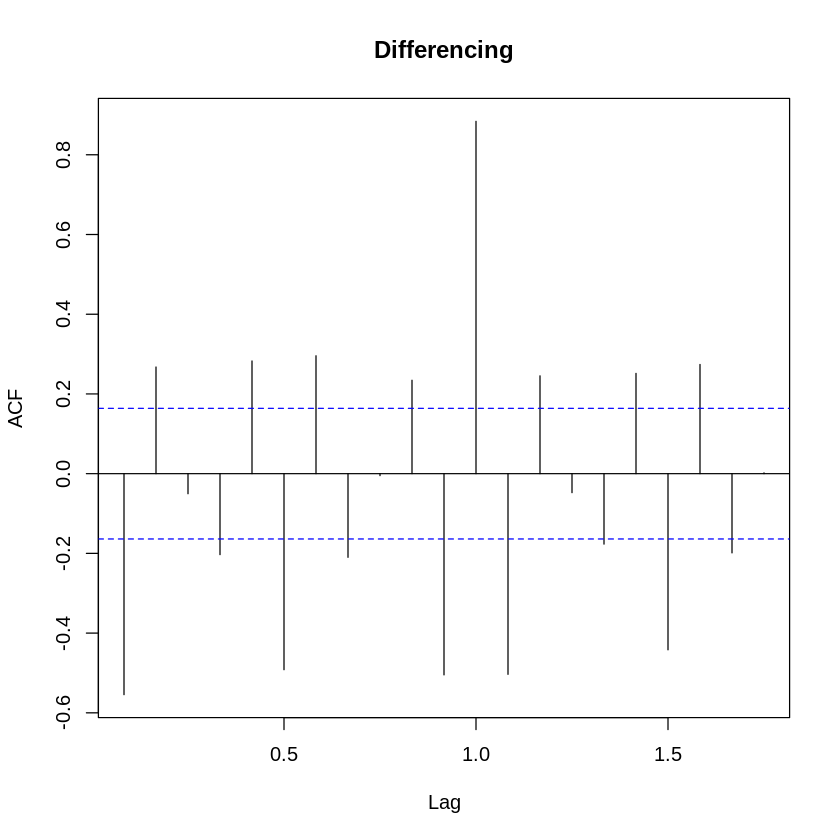

In [12]:
qqnorm(diff(milk))
qqline(diff(milk))

plot(diff(milk),main="Differencing",type="o")
abline(h=0)
# Runs test to check the independency
runs(diff(milk))
acf(diff(milk),main="Differencing")

**Answer**:    
There are some spikes fall out of the margin errors cut off. So, these likely does not resemble a white noise process.

---

2.

In [13]:
set.seed(1)
AR1 <- arima.sim(list(order = c(1,0,0), ar = 0.4), n = 200)
Wt = exp(AR1)

2.a.

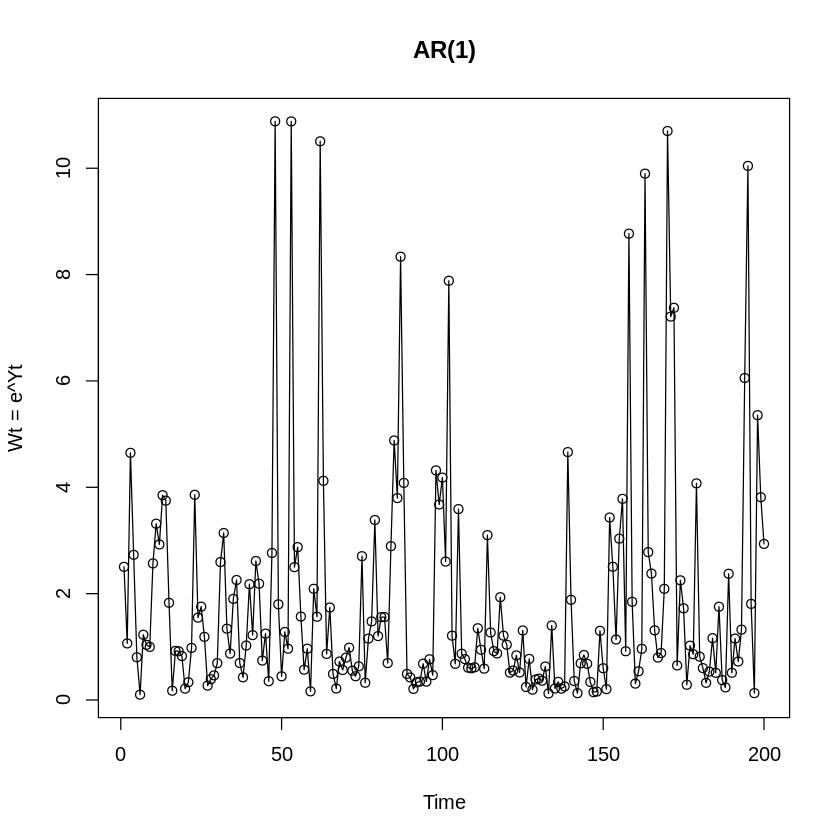

In [14]:
# Plot of AR(1) process
plot(Wt, ylab = "Wt = e^Yt", main = 'AR(1)', type = 'o')

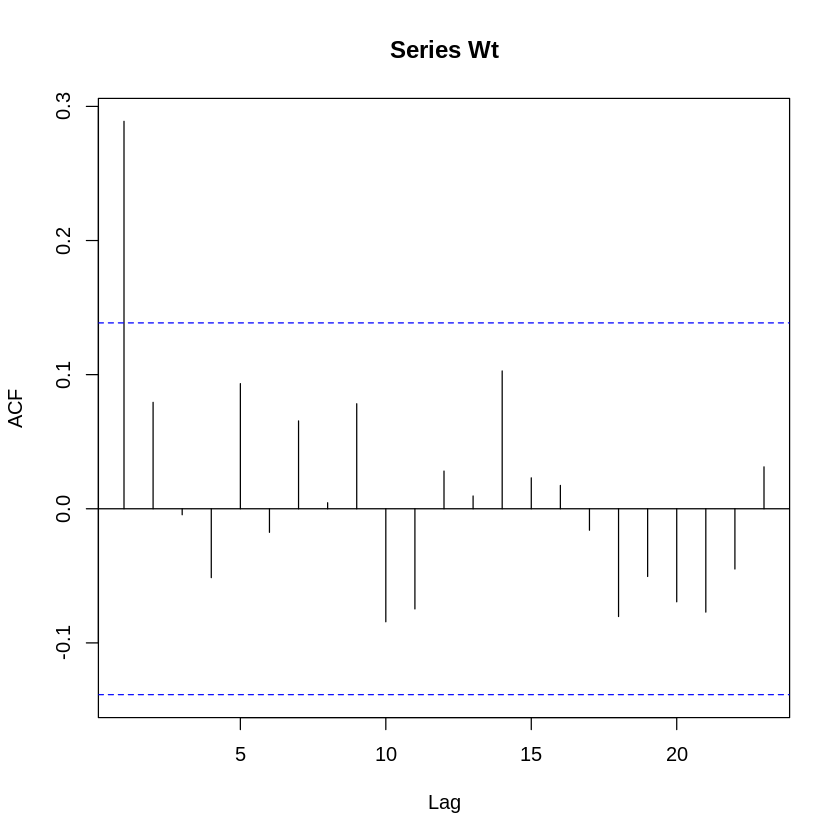

In [15]:
acf(Wt)

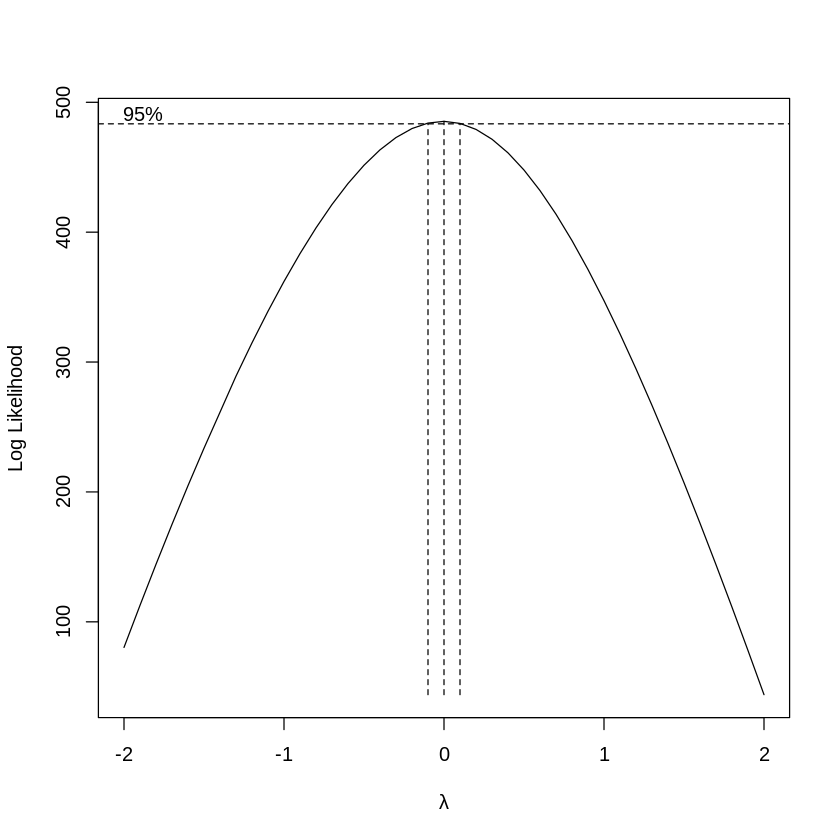

In [16]:
BoxCox.ar(Wt)

**Answer**:   
As Lambda=0 ==> Log transformation

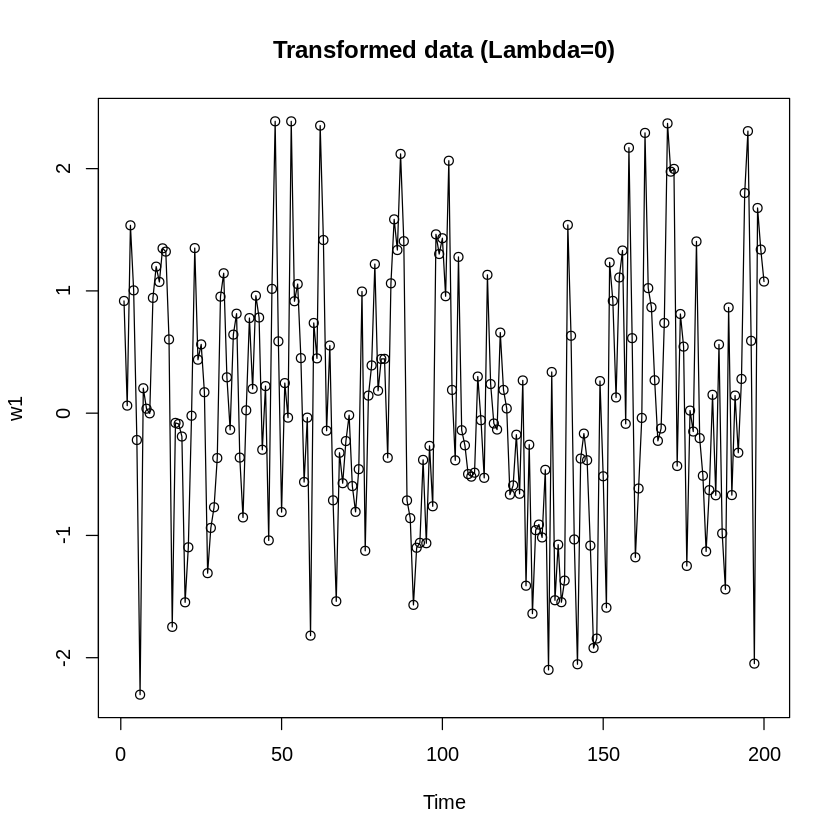

In [17]:
w1 <- log(Wt)
plot(w1, main="Transformed data (Lambda=0)", type = "o")

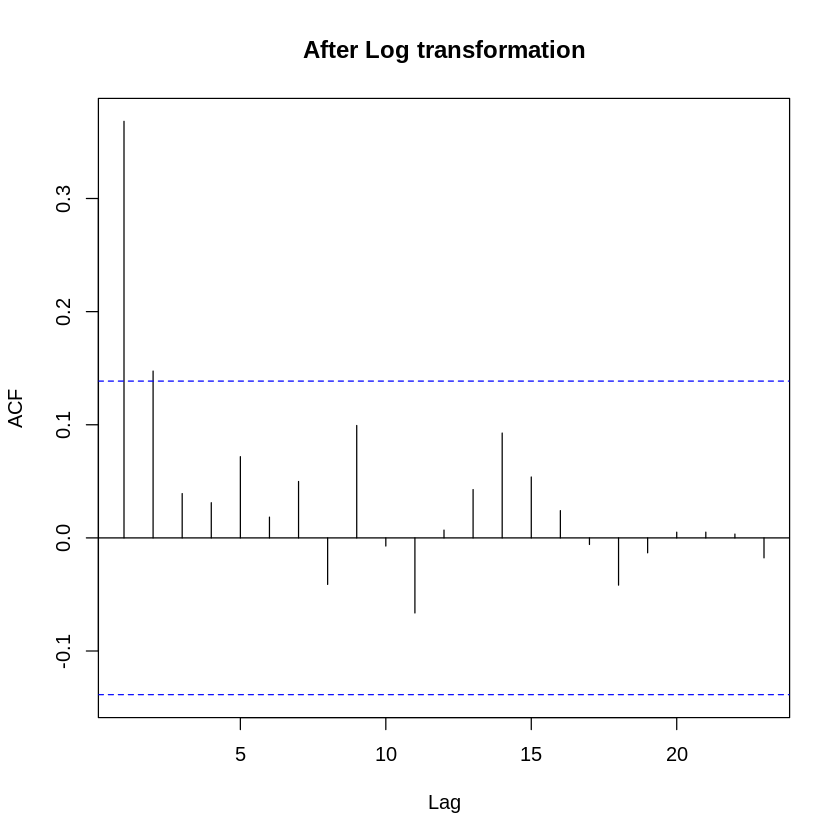

In [18]:
acf(w1, main = 'After Log transformation')

**Answer**:   
It seems to be more stationary after the log transformation.